In [1]:
#Dependency
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors
#Defining k,T,R1 and R2
k = 6
T = 4
R1 = 1
R2 = 25

In [2]:
#Loading dataset in iris
iris = datasets.load_iris()

In [3]:
#printing iris
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
#printing the data part of iris
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
#printing the features names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
#printing the target values
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#printing the target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
#moving iris.data in X
X = iris.data

In [9]:
#printing values in X
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
#moving target valyes to y
y = iris.target

In [11]:
#Dispalying y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
#using train_test_split to split the data into training and testing dataset with test size 0.2 and stratify=y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [13]:
X_train

array([[4.8, 3. , 1.4, 0.3],
       [4.9, 3. , 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 2.5, 5.8, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [7.7, 2.6, 6.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [4.6, 3.6, 1. , 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 2.5, 3. , 1.1],
       [5.6, 2.5, 3.9, 1.1],
       [5. , 3.4, 1.6, 0.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.2, 3.2, 6. , 1.8],
       [6. , 2.7, 5.1, 1.6],
       [6.1, 3. , 4.6, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 2

In [14]:
X_test

array([[5.5, 3.5, 1.3, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.1, 2.6, 5.6, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.5, 3. , 5.2, 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 3. , 4.1, 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.8, 2.7, 4.1, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.5, 5. , 2. ],
       [6.7, 3.1, 4.4, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [5.1, 3.7, 1.5, 0.4],
       [6.7, 3.1, 4.7, 1.5],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [15]:
y_train

array([0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0,
       2, 2, 0, 1, 1, 2, 0, 2, 2, 2])

In [16]:
y_test

array([0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0])

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#finding dimensions of X_train and X_test
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [19]:
#finding dimensions of y_train and y_test
y_train.shape,y_test.shape

((120,), (30,))

In [20]:
#knn classifier
knn = KNeighborsClassifier(n_neighbors=k)

In [21]:
#fitting the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
#prediction 
results = knn.predict(X_test)
results

array([0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0])

In [23]:
#identifying the score/accuracy 
knn.score(X_test,y_test)

0.9666666666666667

In [24]:
#identifying the actual vs predicted resuts
print(pd.crosstab(y_test, results, rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name='Sum'))

Predicted   0   1  2  Sum
Actual                   
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
Sum        10  11  9   30


In [25]:
#confusion matrix 
cm = confusion_matrix(y_test, results)
print(cm)
print(accuracy_score(y_test, results))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
0.9666666666666667


In [26]:
#cross validation
scores = cross_val_score(knn, X, y, cv=T, scoring = 'accuracy')
print(scores)

[0.97368421 0.97368421 0.89189189 0.97297297]


In [27]:
k_list = list(range(R1,R2))
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])


In [28]:
#gridsearchCV
grid = GridSearchCV(knn, k_values, cv=T, scoring='accuracy')

In [29]:
grid.fit(X,y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [30]:
for key in grid.cv_results_.keys():
  print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
mean_test_score
std_test_score
rank_test_score


In [31]:
#score based on gridsearch
print("range ",range(R1,R2))
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

range  range(1, 25)
The best value of k = {'n_neighbors': 16} with 0.9731507823613088 of accuracy.


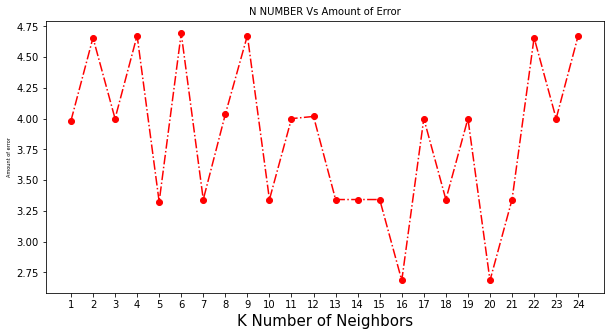

In [32]:
gridresults = grid.cv_results_['mean_test_score']
for p in range(0,len(gridresults)):
    gridresults[p] = (1- gridresults[p])*100
gridresults

plt.figure(figsize=(10,5))
plt.plot(k_list,gridresults,color='red',linestyle='dashdot',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Amount of error', fontdict={'fontsize': 5})
plt.title('N NUMBER Vs Amount of Error', fontdict={'fontsize': 10})
plt.xticks(range(R1,R2,1))
plt.show()


In [33]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

NameError: name 'y_set' is not defined

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


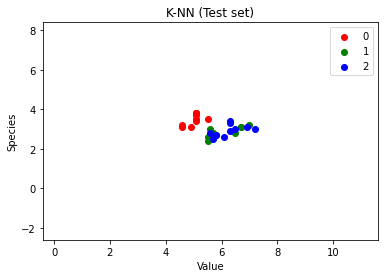

In [35]:
#test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:, 0].max() + 5, step = 1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 5, step = 1))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Value')
plt.ylabel('Species')
plt.legend()
plt.show()

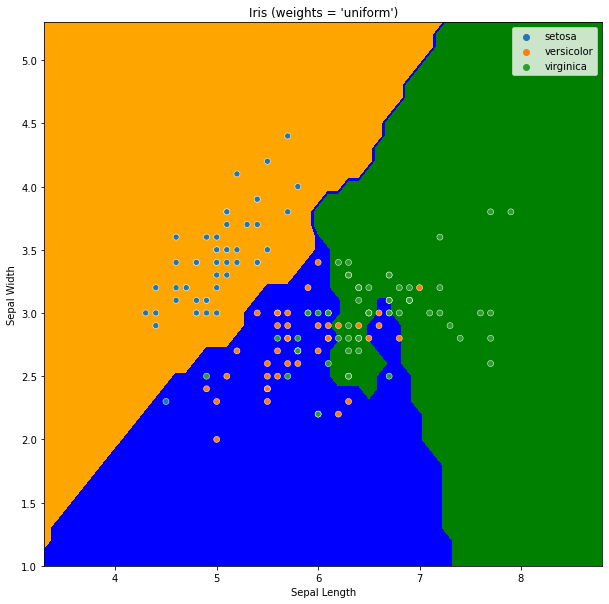

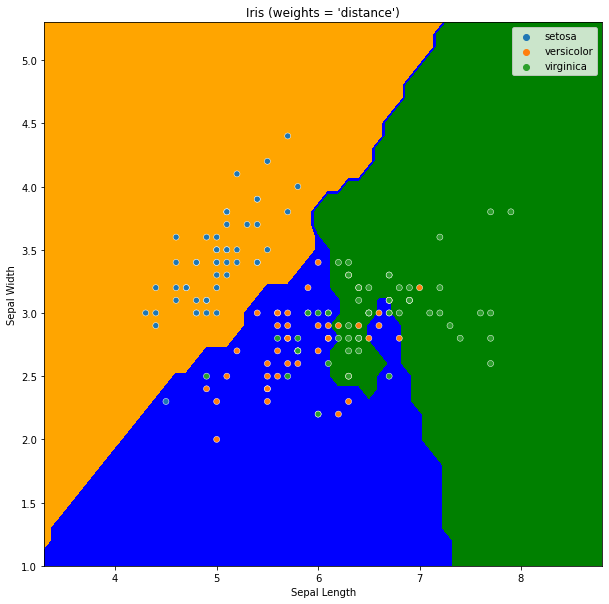

In [34]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .10
light = ListedColormap(['orange', 'blue', 'green'])
cmap_bold = ['green', 'white', 'orange']
for weights in ['uniform','distance']:
    clf = knn
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.contourf(xx, yy, Z, cmap=light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Iris (weights = '%s')" % ( weights))
plt.show()